# CMSE 202 Final S23 (Sect. 003)


### <p style="text-align: right;"> &#9989; TJ McKenna</p>
### <p style="text-align: right;"> &#9989; tjmcken22</p>

The goal of this final is to give you the opportunity to test out some of the skills that you've developed this semester. In particular, you'll reflect on what you know about writing code using Python and showcase some of your new programming skills.

**Important note about using online resources:** This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. **However, the use of any person-to-person communication software is absolutely not acceptable.**

**Do your own work.** This final is designed to give you the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. Any violation of academic integrity could result in you receiving a zero on the final.

You are encouraged to look through the entire exam before you get started so that you can appropriately budget your time and understand the broad goals of the exam.


### Content Knowledge Tested
- Using Github to save and track progress on your work
- Effectively visualizing data
- Using ML tools to create a classification model
- Quantitatively evaluating classification models

## Part 0: Add to your Git repository to track your progress on your exam (10 points total)

Before you get to far along in the exam, you're going to add it to the `cmse202-S23-turnin` repository you created in class so that you can track your progress on the exam and preserve the final version that you turn in. In order to do this you need to

### Part 0.1 (4 Points)

1. Navigate to your `cmse202-S23-turnin` repository and create a new directory called `final`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
3. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" respository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

The file should now show up on your GitHub account in the `cmse202-S23-turnin` repository inside the `final` directory you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. It can be good to get into a habit of committing your changes any time you make a significant modification.

## Part 1 (5 Points)

For this exam, you’ll be working with a data set that contains measurements of a few characteristics of leaves. This is a subset of the larger dataset that can be [found here](http://archive.ics.uci.edu/ml/datasets/Leaf#). We’ll ask you a set of questions that center the classification of these leaves using techniques you’ve worked with in class and on the homework. 

To get started, let’s grab the dataset we’ll be working with.

**Use the following URL to download the dataset. Import the dataset in the cell below.**

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/Final/leaf_data_cleaned.csv`

#Write your code for downloading the data here
curl https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/Final/leaf_data_cleaned.csv -O

In [1]:
#Write your code for importing the data here
import pandas as pd
import numpy as np

df = pd.read_csv('leaf_data_cleaned.csv', delimiter = ',')
df.head()

,Class,Elongation,Isoperimetric Factor,Average Contrast
0,1,0.32396,0.83592,0.127950
1,1,0.36116,0.79867,0.090476
2,1,0.38998,0.80812,0.057445
3,1,0.35376,0.81697,0.065491
4,1,0.44462,0.75493,0.045339


## Part 2 (15 Points)

Use Seaborn to make a visualization showing the distributions (I.e., histograms and/or scatterplots) of each of the different leaf characteristics. Your visualization should represent each of the different leaf types/classes as a different color. This should all be a single figure. Use the [**examples in the seaborn gallery**](https://seaborn.pydata.org/examples/index.html) to help you find the right type of figure. (Note: There are several types of figures that will work for this.)

<AxesSubplot:xlabel='Isoperimetric Factor', ylabel='Average Contrast'>

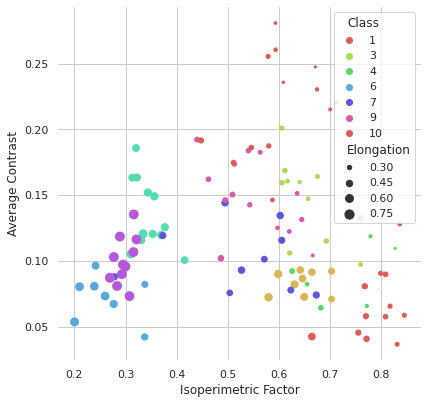

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
class_list = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
sns.scatterplot(x="Isoperimetric Factor", y="Average Contrast",
                hue="Class", size="Elongation",
                palette="hls",
                hue_order=class_list,
                sizes=(1, 100), linewidth=0,
                data=df, ax=ax)

## Part 3 (15 Points)

Look at the distributions of the data. Without doing any model fitting (i.e., just by eye), which pair of leaves do you think would be **easiest** for an ML technique to differentiate between? Which pair of leaves do you believe would be **hardest** to separate? **Why?** Justify your answers using your visualization.

Note: There is not necessarily one correct answer to these questions, we are looking for your reasoning!

The easiest pair of leaves to separate would likely be class 10 and class 6. As the graph shows, class 6 consistently has a leaves with a low Isoperimetric Factor and a low Average Contrast, as well as high elongation. Class ten is the opposite as it sits in the upper right hand corner of the plot with a high Isoperimetric Factor and Average Contrast, but a small Elongation. Looking at the data set we can see these values back up this claim.

Conversely, leaf classes 2 and 7 will be hard to differentiate as they have similar values for all three categories. We can see in between the middle and the bottom right of the plot that the gold dots and the dark blue/purple dots overlap and are of similar size. 

---
### &#128721; STOP (2 points)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit and push the changes to your Git repository.

---

## Part 4 (15 Points)

Create a new dataframe that only contains data for two classes of leaves that you will try to separate. (You may need to use Google to figure out how to do this.)

Note: the 'Class' column labels are integers, not strings.

In [3]:
#Write your code for selecting your data here
ndf = df[df['Class'] == 2]
ndf
sdf = df[df['Class'] == 7]
clean = pd.concat([ndf,sdf]).sample(frac=1)
clean['Class'] = clean['Class'].astype(str)

In [4]:
clean['Class'] = clean['Class'].replace('2',0)
clean['Class'] = clean['Class'].replace('7',1)
clean

,Class,Elongation,Isoperimetric Factor,Average Contrast
16,0,0.61648,0.63037,0.082029
69,1,0.51931,0.60526,0.115600
20,0,0.65828,0.57950,0.072237
62,1,0.54611,0.49437,0.144110
63,1,0.49244,0.57136,0.101200
61,1,0.53329,0.27825,0.087838
13,0,0.60323,0.64916,0.072486
14,0,0.56667,0.66427,0.091328
21,0,0.46549,0.75976,0.132340
64,1,0.55606,0.52669,0.092866


## Part 5 (5 Points)

Split the data into a training and testing set. (Make sure to change the class values so that they're 0 and 1, instead of the leaf class identifiers.) Also, set the `random_state` to be 1.

In [10]:
#Write your code for splitting your data here
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics

x = clean.drop(columns = 'Class')
y = clean['Class']

train_vectors, test_vectors, train_labels, test_labels = train_test_split(x,y, train_size=.75, random_state=1, shuffle=True, stratify=None)


## Part 6 (20 Points)

Create and train a model (either regression or SVM) for classifying the data. You can choose which type of model you want to use. 

**Note:** You may get multiple warnings when creating your model (warnings are *pink*). You may also get a warning about a failure to converge or perfect separation. **It is fine to ignore these warnings.** 

In [16]:
#Write your code for training your model here


logit_model = sm.Logit(train_labels, train_vectors)
result = logit_model.fit()
print(result.summary() )

Optimization terminated successfully.
         Current function value: 0.548324
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                   15
Model:                          Logit   Df Residuals:                       12
Method:                           MLE   Df Model:                            2
Date:                Thu, 04 May 2023   Pseudo R-squ.:                  0.2064
Time:                        14:25:33   Log-Likelihood:                -8.2249
converged:                       True   LL-Null:                       -10.364
Covariance Type:            nonrobust   LLR p-value:                    0.1178
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Elongation               3.0021      6.565      0.457      0.647      -9.866      15.870

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_lfw_people
import time
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D


start = time.time()

#make some temporary variables so you can change this easily
tmp_vectors = train_vectors
tmp_labels = train_labels

print("Fitting the classifier to the training set")
# a dictionary of hyperparameters: key is the name of the parameter, value is a list of values to test
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
              'kernel': ['linear','rbf']}
# make a classifier by searching over a classifier and the parameter grid
clf = GridSearchCV(SVC(class_weight='balanced'), param_grid)

# we have a "good" classifier (according to GridSearchCV), how's it look
clf = clf.fit(tmp_vectors, tmp_labels)
print("Best estimator found by grid search:")
print(clf.best_estimator_)
print("Best parameters found by grid search:")
print(clf.best_params_)

end = time.time()
print("Runtime",end - start)

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.0001, kernel='linear')
Best parameters found by grid search:
{'C': 1000.0, 'gamma': 0.0001, 'kernel': 'linear'}
Runtime 1.0876929759979248


In [23]:
predict_vectors = test_vectors
true_labels = test_labels

print("Predicting names on the test set")
pred_labels = clf.predict(predict_vectors)

print(classification_report(true_labels, pred_labels))
print(confusion_matrix(true_labels, pred_labels))

Predicting names on the test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

[[2 0]
 [0 3]]


---
### &#128721; STOP (2 points)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit and push the changes to your Git repository.

---

## Part 7 (5 Points)

Evaluate your model by finding the accuracy, recall, and precision using the training data. There are not many data points for this set, so you will see small numbers in the Confusion matrix.

In [20]:
#Write your code for determining the accuracy, recall, and precision of your model
from sklearn import metrics
from sklearn.metrics import confusion_matrix


predicted_vals = result.predict(test_vectors)
pred_labels = list(map(round, predicted_vals))

print(confusion_matrix(test_labels, pred_labels))

[[2 0]
 [1 2]]


## Part 8 (10 Points)

Do you think that this model does a good job of classifying the data? How does it compare to previous classification models you’ve created, both in class and on the homework?

*Write your answer here*

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!** (2 points)

Take a moment to save your notebook, commit the changes to your Git repository.

---

## You're done! Congrats on finishing CMSE 202!

&#169; Copyright 2023,  Department of Computational Mathematics, Science and Engineering at Michigan State University